# Hyberbanding + Andro's Algorithm

1. XGBoost - hyperparameters
2. პარამეტრების ჭრილი

In [ ]:
import pandas as pd

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv")

In [3]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
df.shape

(30000, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [7]:
import xgboost as xgb

# Custom

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df.rename(columns={"default.payment.next.month": "TARGET"}, inplace=True)

In [10]:
df.drop(['ID'], axis=1, inplace=True)

In [11]:
train_X, test_X = train_test_split(df, test_size=0.1)

In [12]:
train, valid = train_test_split(train_X, test_size=0.1)

1. Train +
2. Test +
3. Valid +

In [13]:
# Get all columns except labels
train_dm = train.drop(['TARGET'], axis=1)
valid_dm = valid.drop(['TARGET'], axis=1)

In [14]:
train_dm = xgb.DMatrix(train_dm, label=train['TARGET'])
valid_dm = xgb.DMatrix(valid_dm, label=valid['TARGET'])

In [15]:
# Watchlist

In [16]:
watchlist = [(valid_dm, 'eval'), (train_dm, 'train')]

In [17]:
# Hyperband

In [18]:
import math 
import numpy as np

In [19]:
delta = 3
max_iter = 600
s_max = int(math.log(max_iter, delta))
B = (s_max + 1) * max_iter

In [20]:
s_max

5

In [21]:
# intervals for hparams

In [22]:
unbound_param = np.arange(0, 10, 0.5)
bound_param_1000 = np.arange(0, 1, 0.001)
bound_param_20 = np.arange(0, 1, 0.05)

In [23]:
# iters

In [24]:
from sklearn import metrics

In [25]:
def auc(target, pred):
#    print(f"Tar: {target}, pred: {pred} \n")
    try:
        fpr, tpr, thresholds = metrics.roc_curve(target, pred, pos_label=1)
        return metrics.auc(fpr, tpr)
    except ValueError:
        pass
        

In [26]:
out = pd.DataFrame(columns=['eta', 'gamma', 'min_child_weight', 'lambda', 'alpha', 'subsample', 'colsample_bytree', 'colsample_bylevel', 'max_depth', 's', 'i', 'j'])

In [27]:
train_dm.num_row()

24300

In [28]:
col_share = 2 / train_dm.num_row()

In [29]:
list(range(5))

[0, 1, 2, 3, 4]

In [54]:
np.random.rand()

0.32040135321655727

In [56]:
success = 1
fail    = 1

In [55]:
for s in reversed(range(s_max + 1)):
    n = math.floor((s_max + 1) / (s + 1)) * delta**s
    r = max_iter * delta ** (-s)

    config = pd.DataFrame(
        {'eta': np.random.choice(bound_param_1000, n),
         
         'gamma': np.random.choice(unbound_param, n),
         'min_child_weight': np.random.choice(unbound_param, n),
         'lambda': np.random.choice(unbound_param, n),
         'alpha': np.random.choice(unbound_param, n),
         
         'subsample': np.random.choice(bound_param_20, n),
         'colsample_bytree': np.random.choice(bound_param_20, n),
         'colsample_bylevel': np.random.choice(bound_param_20, n),
         
         'max_depth': np.random.choice(range(2,10), n),
         's': "",
         'i': "",
         'j': ''
         })
    
    for i in range(s):
        num_of_confs = math.floor(n * delta ** (-i))
        num_of_iters = math.floor(r * delta ** i)
                        
        for j in range(1, num_of_confs):
            tree = config['colsample_bytree'][j]
            level = config['colsample_bylevel'][j]
            
            if tree < col_share and level < col_share:
                    tree = 1
                    level = col_share   
            elif tree < col_share:
                tree = col_share / level
            elif (level < col_share) or (tree * level < col_share):
                level = col_share / tree
            
            config.at[j, 'colsample_bytree'] = tree
            config.at[j, 'colsample_bylevel'] = level
            
            parameters = {
                'booster': 'gbtree',
                'eta': config['eta'][j],
                'gamma': config['gamma'][j],
                'max_depth': config['max_depth'][j],
                'min_child_weight': config['min_child_weight'][j],
                'subsample': config['subsample'][j],
                'colsample_bytree': config['colsample_bytree'][j],
                'colsample_bylevel': config['colsample_bylevel'][j],
                'lambda': config['lambda'][j],
                'alpha': config['alpha'][j],
                'seed': 1,
                'eval_metric': 'auc',
                'objective': 'binary:logistic',
                'silent': True
            }

            model_hyperband = xgb.train(
                parameters,
                train_dm,
                num_of_iters,
                watchlist
            )

            valid_pred = model_hyperband.predict(valid_dm)
            train_pred = model_hyperband.predict(train_dm)

            train_auc = auc(train['TARGET'], train_pred)
            valid_auc = auc(valid['TARGET'], valid_pred)
            
            # GINI
            train_gini = abs(train_auc * 2 - 1)
            valiud_gini = abs(valid_auc * 2 - 1)
            
            if np.random.rand() > valid_gini:
                fail    = fail + 1
            else:
                success = success + 1

            config.at[j, 'success'] = success
            config.at[j, 'fail']    = fail
            config.at[j, 'num_of_iters'] = num_of_iters
            config.at[j, 'train_gini'] = train_gini
            config.at[j, 'valid_gini'] = valid_gini
            try: 
                config.at[j, 'overfit'] = train_gini - valid_gini
            except TypeError:
                pass
            config.at[j, 's'] = s
            config.at[j, 'i'] = i
            config.at[j, 'j'] = j
    
        result = config[config['overfit'] < 0.05]
        result = result.sort_values(['overfit', 'valid_acc'], ascending=[True, False])
        result[:math.floor(num_of_confs / delta)]

    out = pd.concat([out, result], sort=False)


IndentationError: expected an indented block (<ipython-input-55-b46e50e5f2b2>, line 78)

In [74]:
beta.pdf?

Signature: beta.pdf(x, *args, **kwds)
Docstring:
Probability density function at x of the given RV.

Parameters
----------
x : array_like
    quantiles
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
pdf : ndarray
    Probability density function evaluated at x
File:      ~/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method


In [95]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [112]:
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y, co

In [ ]:
plt.plot()

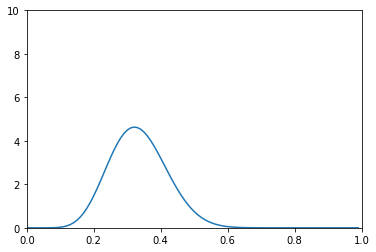

In [113]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
a = 10
b = 20
x = np.arange (0, 1, 0.01)
y = beta.pdf(x,a,b, scale=1)
plt.axis([0, 1, 0, 10])


In [135]:
y

array([0.00000000e+00, 1.65481658e-10, 6.98628929e-08, 2.21021952e-06,
       2.41754472e-05, 1.47624930e-04, 6.22976462e-04, 2.03582081e-03,
       5.51391121e-03, 1.29315387e-02, 2.70575734e-02, 5.15971197e-02,
       9.10926112e-02, 1.50673590e-01, 2.35669869e-01, 3.51125270e-01,
       5.01265073e-01, 6.88977777e-01, 9.15370490e-01, 1.17944837e+00,
       1.47795387e+00, 1.80538385e+00, 2.15418375e+00, 2.51510122e+00,
       2.87766739e+00, 3.23076410e+00, 3.56323096e+00, 3.86446507e+00,
       4.12497082e+00, 4.33682375e+00, 4.49402226e+00, 4.59271118e+00,
       4.63127226e+00, 4.61028609e+00, 4.53237875e+00, 4.40197267e+00,
       4.22496561e+00, 4.00836372e+00, 3.75989430e+00, 3.48762269e+00,
       3.19959379e+00, 2.90351516e+00, 2.60649357e+00, 2.31483225e+00,
       2.03389144e+00, 1.76801071e+00, 1.52048832e+00, 1.29361014e+00,
       1.08871907e+00, 9.06315134e-01, 7.46176019e-01, 6.07488795e-01,
       4.88984135e-01, 3.89066012e-01, 3.05931226e-01, 2.37674798e-01,
      

In [139]:
f, ax = plt.subplots(1)
ax.plot(x, y)
ax.plot(x, beta.pdf(x, 100, 50, scale=1))

In [129]:
max(beta.pdf(x, 100, 50, scale=1))

10.358148915251169

In [130]:
max(beta.pdf(x,a,b, scale=1))

4.631272256459908

In [63]:
from scipy.stats import beta
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [31]:
out.head()

eta  gamma  min_child_weight  lambda  alpha  subsample  \
106  0.529    4.5               9.5     9.5    8.0       0.15   
150  0.754    9.0               6.5     6.5    3.5       0.15   
154  0.298    6.5               4.5     9.0    7.0       0.10   
162  0.818    1.0               1.5     4.5    8.5       0.15   
112  0.217    4.0               1.0     8.5    6.5       0.55   

     colsample_bytree  colsample_bylevel max_depth  s  i    j  num_of_iters  \
106               0.2               0.95         6  5  0  106           2.0   
150               0.2               0.55         5  5  0  150           2.0   
154               0.1               0.50         9  5  0  154           2.0   
162               0.1               0.65         3  5  0  162           2.0   
112               0.2               0.60         7  5  0  112           2.0   

     train_acc  valid_acc   overfit  
106   0.674923   0.698746 -0.023823  
150   0.674923   0.698746 -0.023823  
154   0.566899   0.590523 -0.023624  
162   0.606070   0.626670 -0.020600  
112   0.617271   0.636320 -0.019050

In [47]:
# train_acc * 2 - 1
out['train_gini'] = out['train_acc'].map(lambda x: x * 2 - 1)

In [48]:
out['valid_gini'] = out['valid_acc'].map(lambda x: x * 2 - 1)

In [49]:
out.sort_values(by=['train_acc', 'valid_acc'], ascending=False).head()

eta  gamma  min_child_weight  lambda  alpha  subsample  \
1   0.077    1.0               3.5     8.5    4.0       0.85   
3   0.249    2.5               9.0     0.0    3.0       0.95   
23  0.178    1.0               4.5     5.5    6.5       0.75   
2   0.504    6.0               8.0     2.0    5.5       0.55   
8   0.217    1.5               6.0     7.5    3.5       0.65   

    colsample_bytree  colsample_bylevel max_depth  s  i   j  num_of_iters  \
1               0.25           0.300000         8  2  1   1         199.0   
3               0.40           0.000206         7  4  2   3          66.0   
23              0.70           0.650000         9  3  0  23          22.0   
2               0.85           0.450000         4  2  1   2         199.0   
8               0.35           0.650000         4  4  2   8          66.0   

    train_acc  valid_acc   overfit  train_gini  valid_gini  
1    0.822005   0.780580  0.041425    0.644011    0.561160  
3    0.820699   0.774729  0.045969    0.641397    0.549459  
23   0.818205   0.779253  0.038952    0.636410    0.558505  
2    0.816215   0.767068  0.049148    0.632431    0.534135  
8    0.811035   0.778578  0.032456    0.622069    0.557157

In [51]:
out.sort_values(by=list(reversed(['train_acc', 'valid_acc'])), ascending=False).head()

eta  gamma  min_child_weight  lambda  alpha  subsample  \
13  0.332    7.5               9.0     0.5    3.5       0.85   
1   0.077    1.0               3.5     8.5    4.0       0.85   
23  0.178    1.0               4.5     5.5    6.5       0.75   
6   0.078    2.0               2.5     1.0    9.0       0.20   
14  0.478    1.0               9.5     4.5    7.0       0.40   

    colsample_bytree  colsample_bylevel max_depth  s  i   j  num_of_iters  \
13              0.60               0.40         8  5  2  13          22.0   
1               0.25               0.30         8  2  1   1         199.0   
23              0.70               0.65         9  3  0  23          22.0   
6               0.60               0.55         8  3  1   6          66.0   
14              0.90               0.50         4  4  1  14          22.0   

    train_acc  valid_acc   overfit  train_gini  valid_gini  
13   0.805114   0.782104  0.023010    0.610228    0.564209  
1    0.822005   0.780580  0.041425    0.644011    0.561160  
23   0.818205   0.779253  0.038952    0.636410    0.558505  
6    0.792168   0.779207  0.012961    0.584336    0.558414  
14   0.800587   0.778854  0.021732    0.601173    0.557709

In [50]:
out.head()

eta  gamma  min_child_weight  lambda  alpha  subsample  \
106  0.529    4.5               9.5     9.5    8.0       0.15   
150  0.754    9.0               6.5     6.5    3.5       0.15   
154  0.298    6.5               4.5     9.0    7.0       0.10   
162  0.818    1.0               1.5     4.5    8.5       0.15   
112  0.217    4.0               1.0     8.5    6.5       0.55   

     colsample_bytree  colsample_bylevel max_depth  s  i    j  num_of_iters  \
106               0.2               0.95         6  5  0  106           2.0   
150               0.2               0.55         5  5  0  150           2.0   
154               0.1               0.50         9  5  0  154           2.0   
162               0.1               0.65         3  5  0  162           2.0   
112               0.2               0.60         7  5  0  112           2.0   

     train_acc  valid_acc   overfit  train_gini  valid_gini  
106   0.674923   0.698746 -0.023823    0.349846    0.397492  
150   0.674923   0.698746 -0.023823    0.349846    0.397492  
154   0.566899   0.590523 -0.023624    0.133797    0.181046  
162   0.606070   0.626670 -0.020600    0.212141    0.253340  
112   0.617271   0.636320 -0.019050    0.234541    0.272641

In [34]:
out.to_excel("out.xlsx")

In [35]:
out['s'].unique()

array([5, 4, 3, 2, 1], dtype=object)

In [36]:
result['s'].unique()

array([1], dtype=object)